# **BIG MART SALES PREDICTION**

**IMPORTING LIBRARIES**

In [394]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

In [396]:
train_dataset = pd.read_csv('.\Train.csv')

In [397]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [399]:
print('The training dataset has {} columns.'.format(train_dataset.shape[1]))
print('The training dataset has {} rows.'.format(train_dataset.shape[0]))

The training dataset has 12 columns.
The training dataset has 8523 rows.


In [400]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


'Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year' and 'Item_Outlet_Sales' are numerical features


'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type' and "Outlet_Sales' are strings/objects.


In [ ]:
train_dataset.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
train_dataset.describe(include="O")

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

In [ ]:
categorical_features=train_dataset.select_dtypes(include=['O'])
categorical_features.head()

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3         NaN               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

In [ ]:
numerical_features=train_dataset.select_dtypes(exclude=['O'])
numerical_features.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [ ]:
for feature in categorical_features:
     print('The unique label in {}:{}'.format(feature,categorical_features[feature].unique()))

The unique label in Item_Identifier:['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
The unique label in Item_Fat_Content:['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
The unique label in Item_Type:['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
The unique label in Outlet_Identifier:['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
The unique label in Outlet_Size:['Medium' nan 'High' 'Small']
The unique label in Outlet_Location_Type:['Tier 1' 'Tier 3' 'Tier 2']
The unique label in Outlet_Type:['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
train_dataset['Item_Fat_Content']=train_dataset['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
train_dataset['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# **Visualization**

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

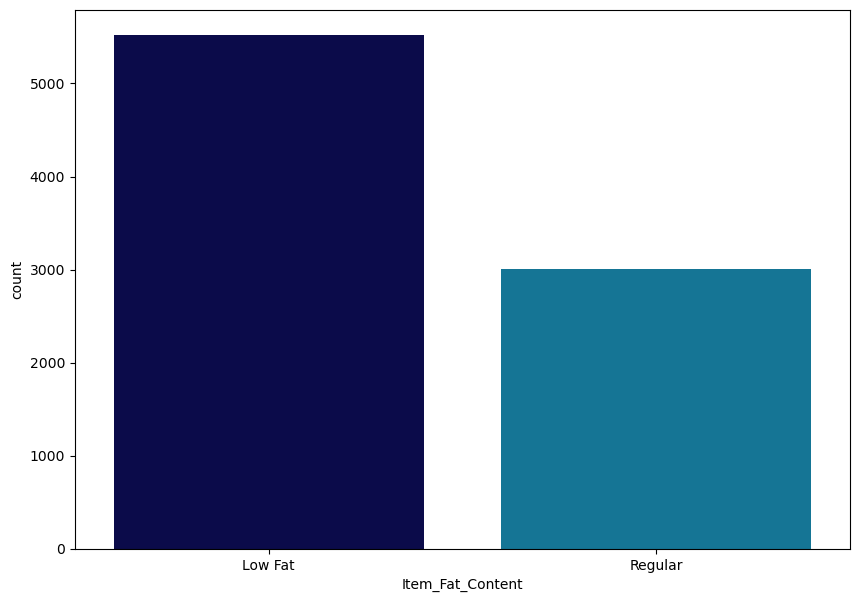

In [413]:
plt.figure(figsize=(10,7))
sns.countplot(x='Item_Fat_Content', data=train_dataset, palette='ocean')


<Axes: xlabel='Item_Type', ylabel='count'>

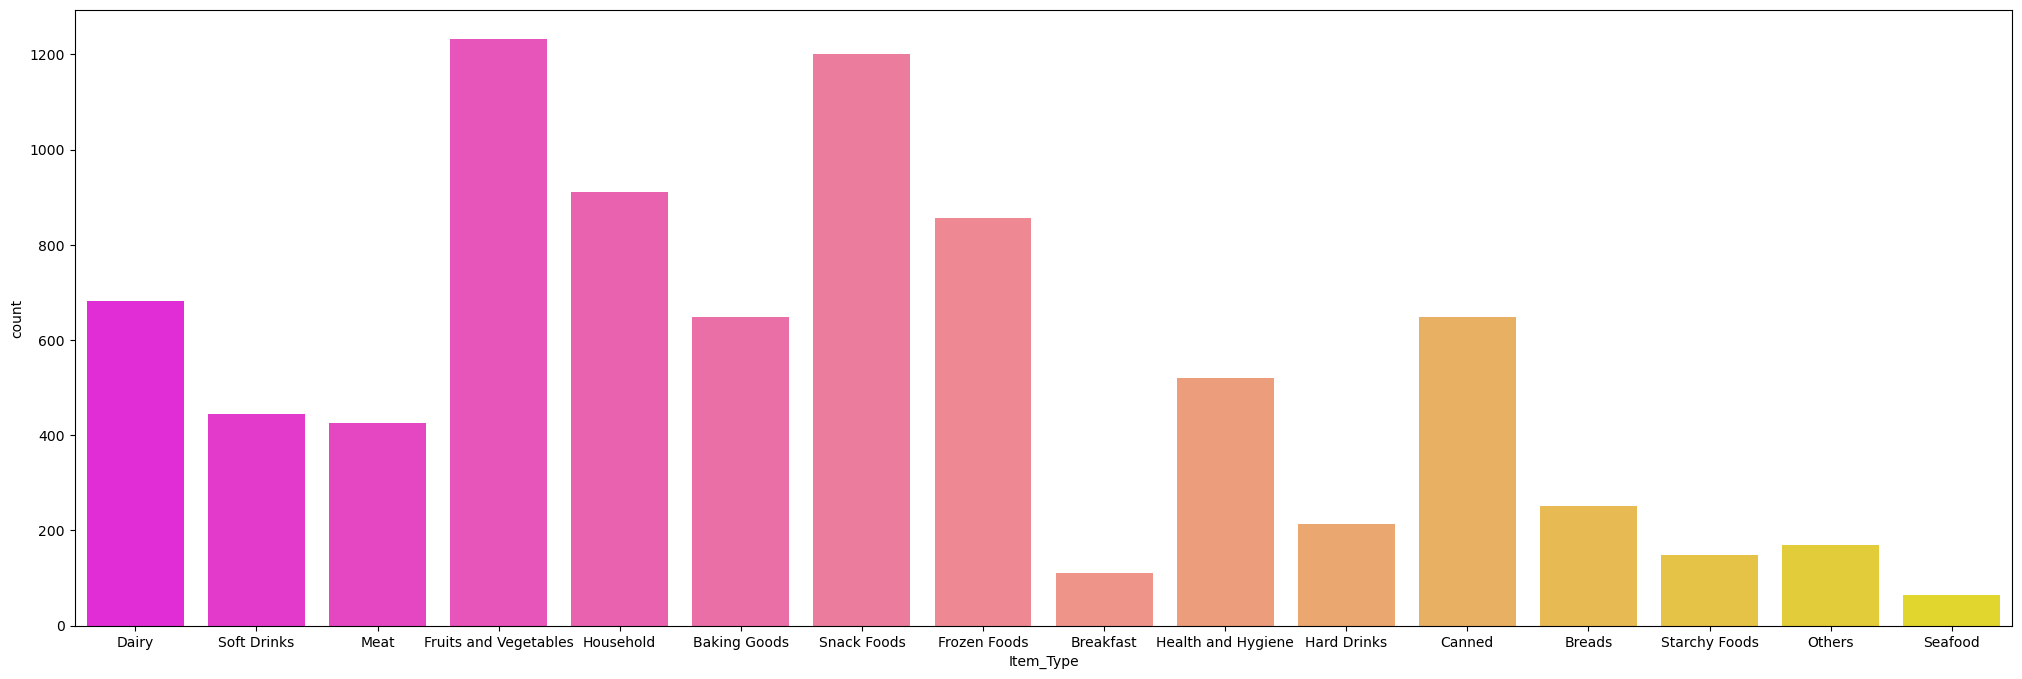

In [416]:
plt.figure(figsize=(25,8))
sns.countplot(x='Item_Type', data=train_dataset, palette='spring')


<Axes: xlabel='Outlet_Size', ylabel='count'>

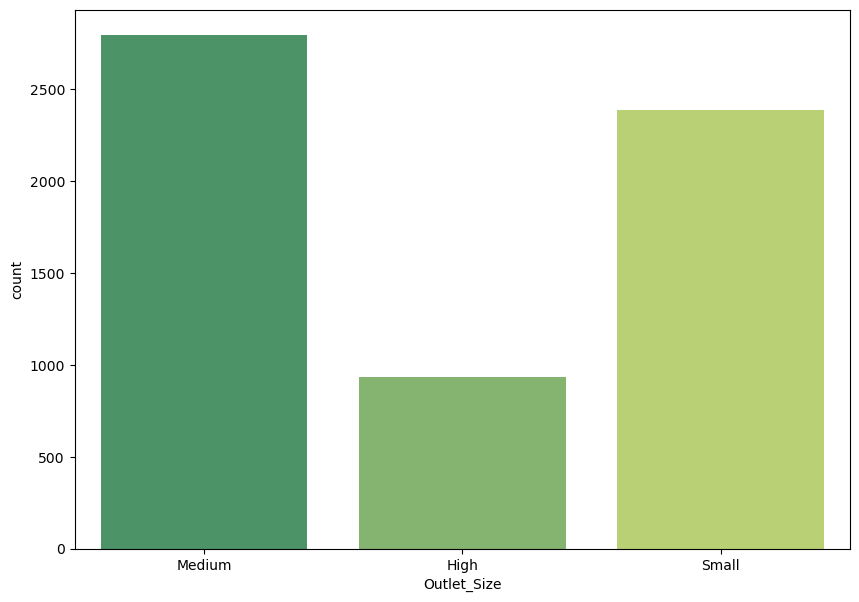

In [417]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outlet_Size',data=train_dataset,palette='summer')

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

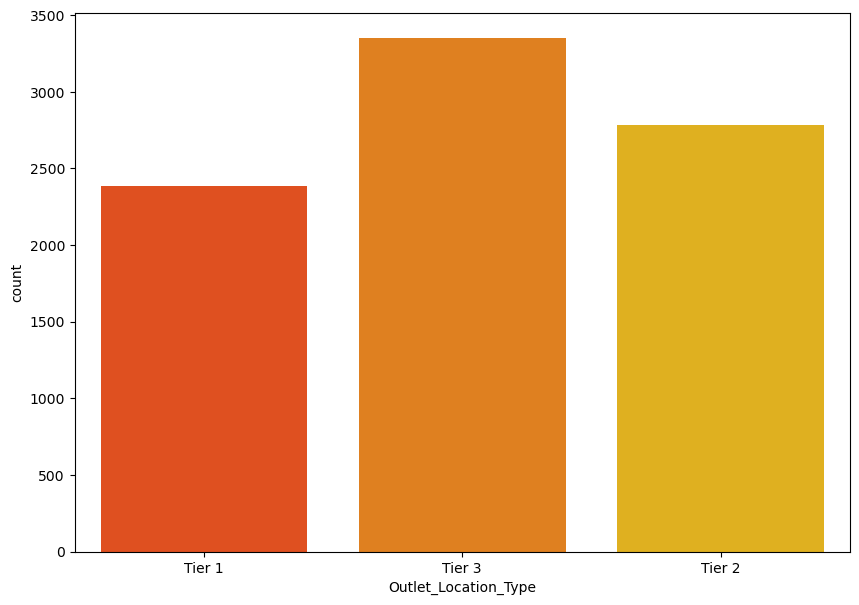

In [419]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outlet_Location_Type',data=train_dataset,palette='autumn')

<Axes: xlabel='Outlet_Type', ylabel='count'>

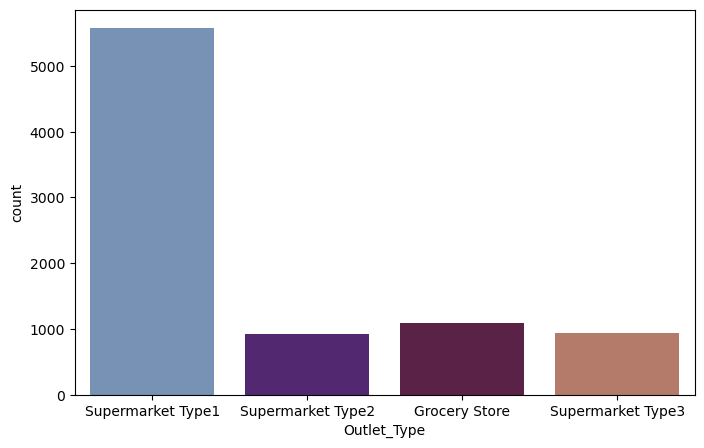

In [422]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train_dataset,palette='twilight')

**Numerical feature analysis**

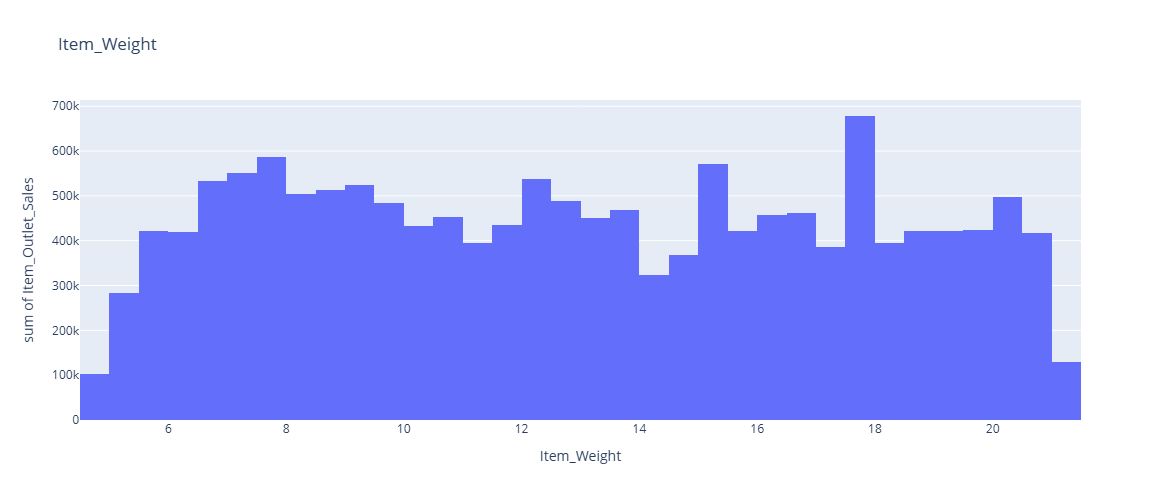

In [424]:
fig=px.histogram(data_frame=train_dataset,x='Item_Weight',y='Item_Outlet_Sales',width=800,height=500,title="Item_Weight")
fig.show()

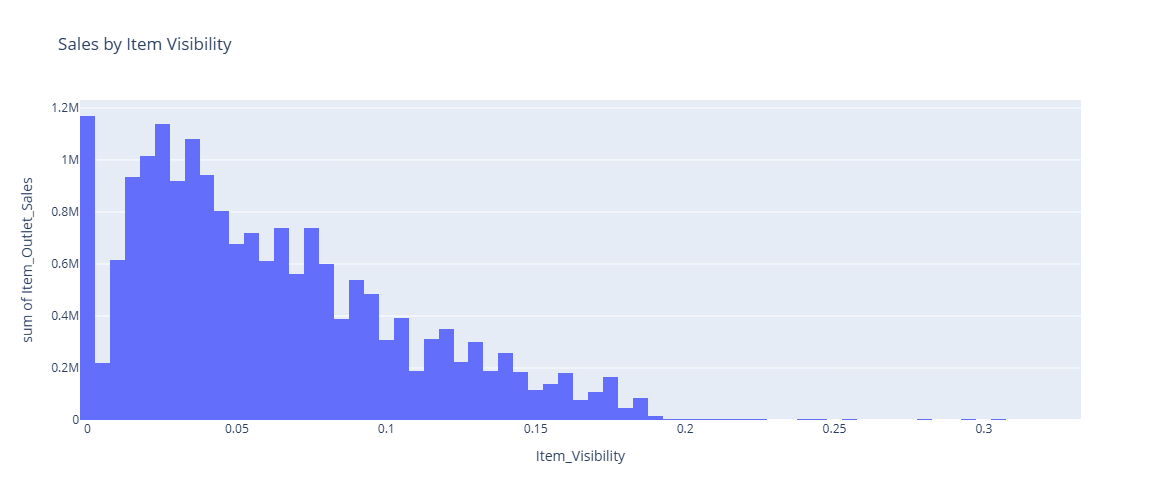

In [425]:
fig=px.histogram(data_frame=train_dataset,x='Item_Visibility',y='Item_Outlet_Sales',width=800,height=500,title="Sales by Item Visibility")
fig.show()

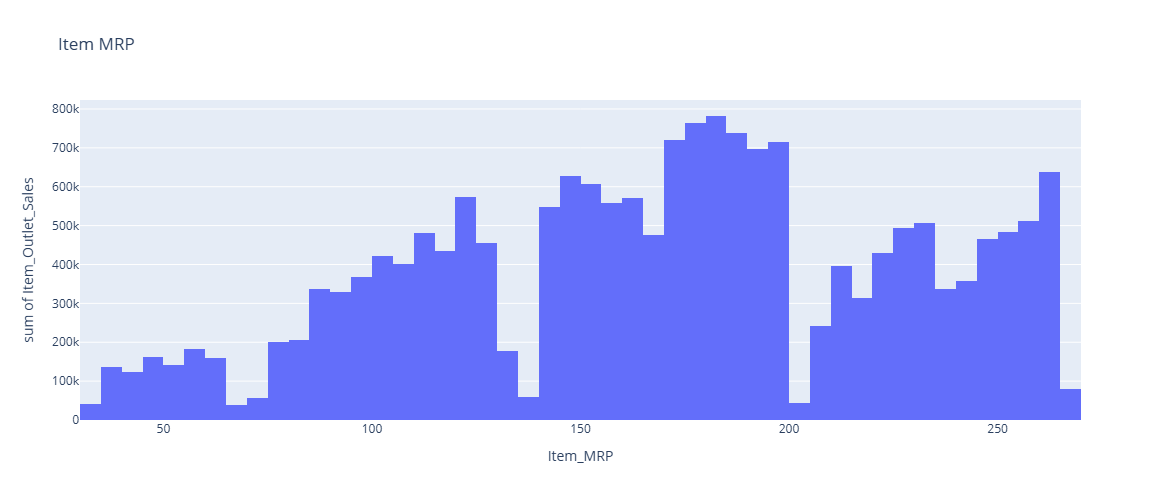

In [426]:
fig=px.histogram(data_frame=train_dataset,x='Item_MRP',y='Item_Outlet_Sales',width=800,height=500,title="Item MRP")
fig.show()

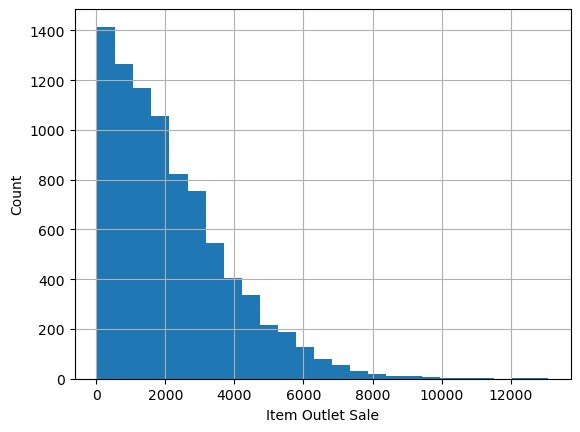

In [427]:
train_dataset['Item_Outlet_Sales'].hist(bins=25)
plt.xlabel("Item Outlet Sale")
plt.ylabel("Count")
plt.show()

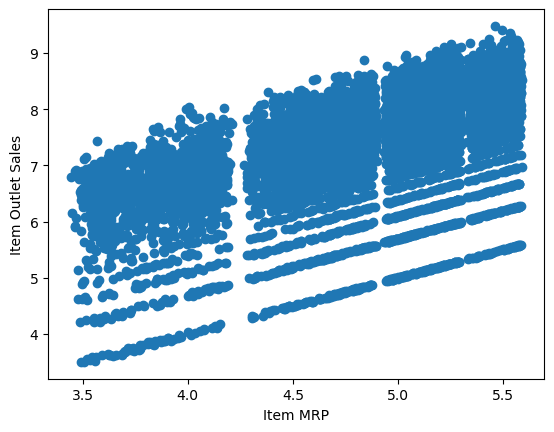

In [ ]:
#logarithme de transformation pour les outlets :
data=train_dataset.copy()
data['Item_MRP']=np.log(data['Item_MRP'])
data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"])
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()

**Categorical feature analysis**

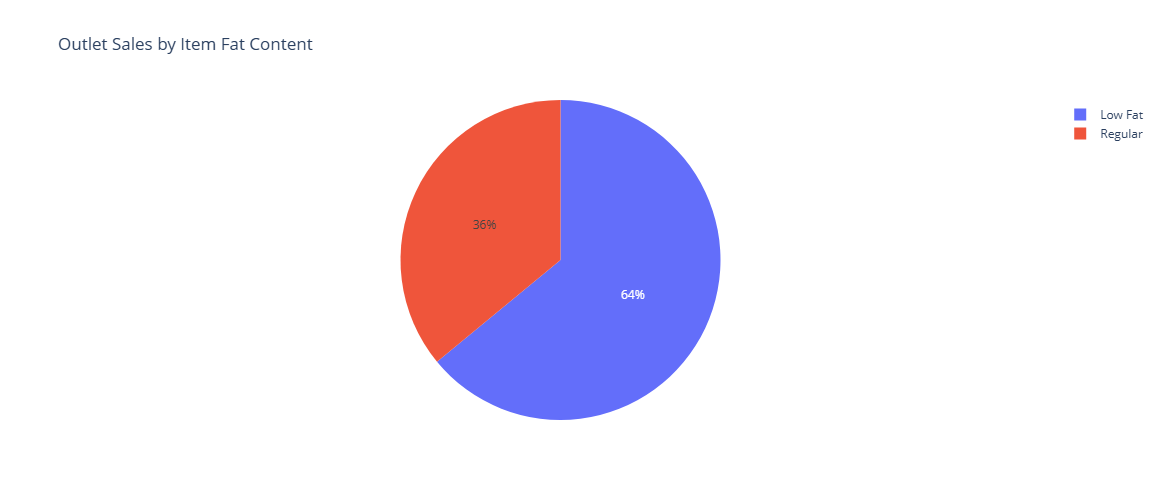

In [ ]:
fig=px.pie(train_dataset,names='Item_Fat_Content',values='Item_Outlet_Sales',width=800,height=500,title='Outlet Sales by Item Fat Content')
fig.show()

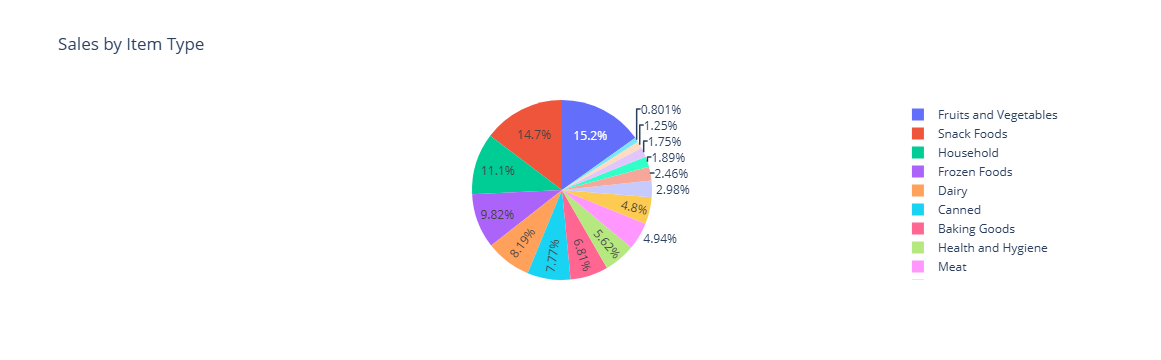

In [ ]:
fig=px.pie(train_dataset,names='Item_Type',values='Item_Outlet_Sales',title='Sales by Item Type')
fig.show()

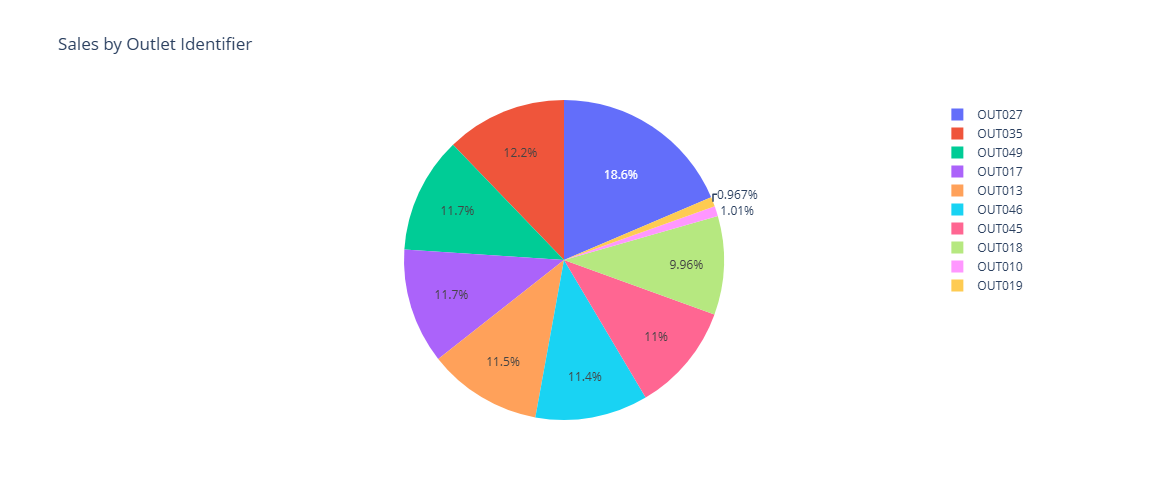

In [ ]:
fig=px.pie(train_dataset,names='Outlet_Identifier',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet Identifier')
fig.show()

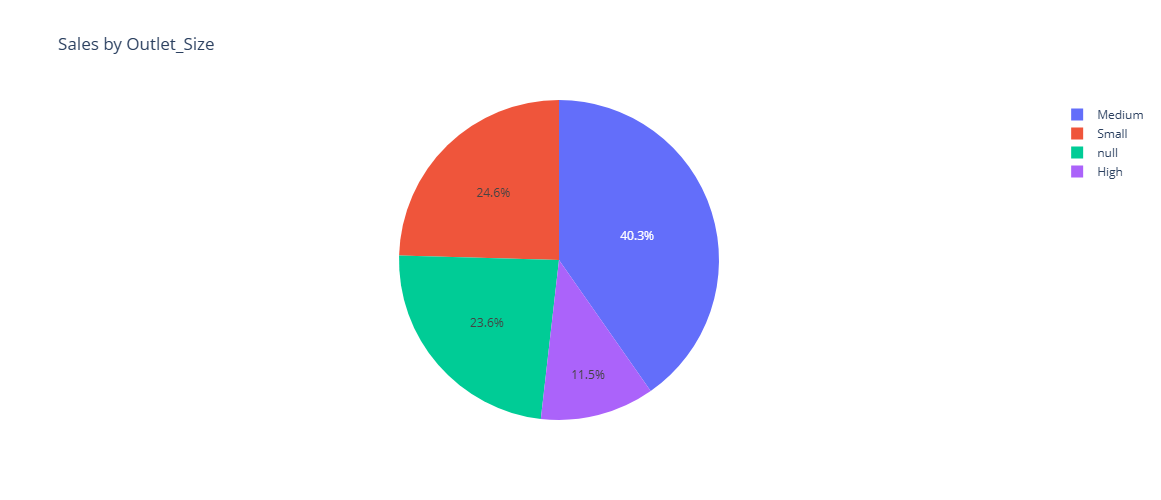

In [ ]:
fig=px.pie(train_dataset,names='Outlet_Size',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet_Size')
fig.show()

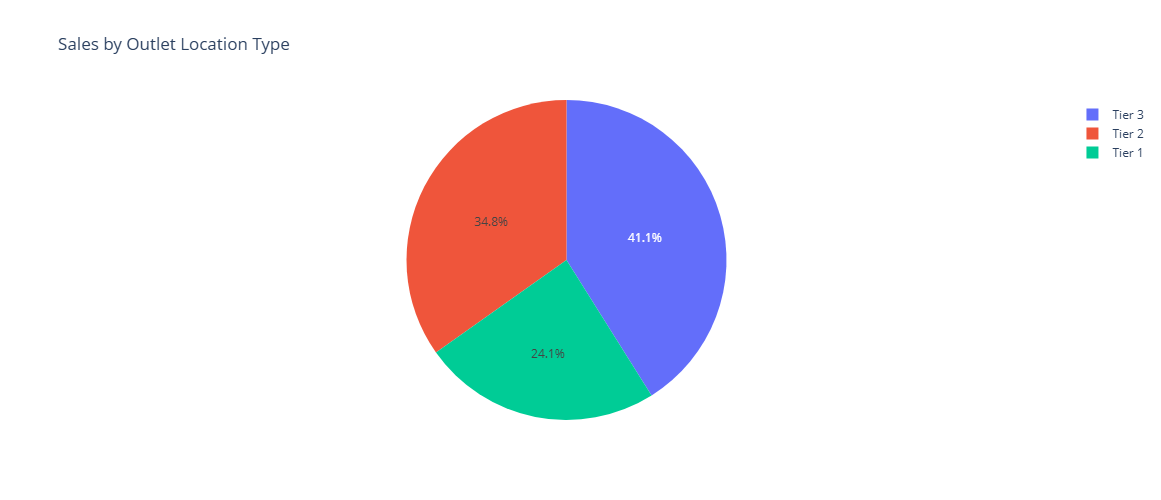

In [ ]:
fig=px.pie(data_frame=train_dataset,names='Outlet_Location_Type',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet Location Type')
fig.show()

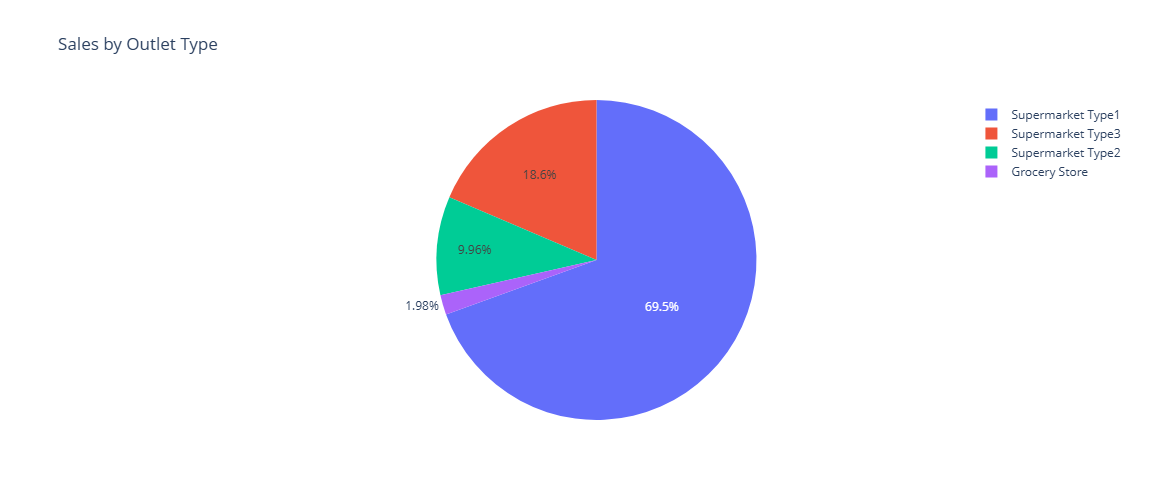

In [ ]:
fig=px.pie(data_frame=train_dataset,names='Outlet_Type',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet Type')
fig.show()

**Multivariate analysis**

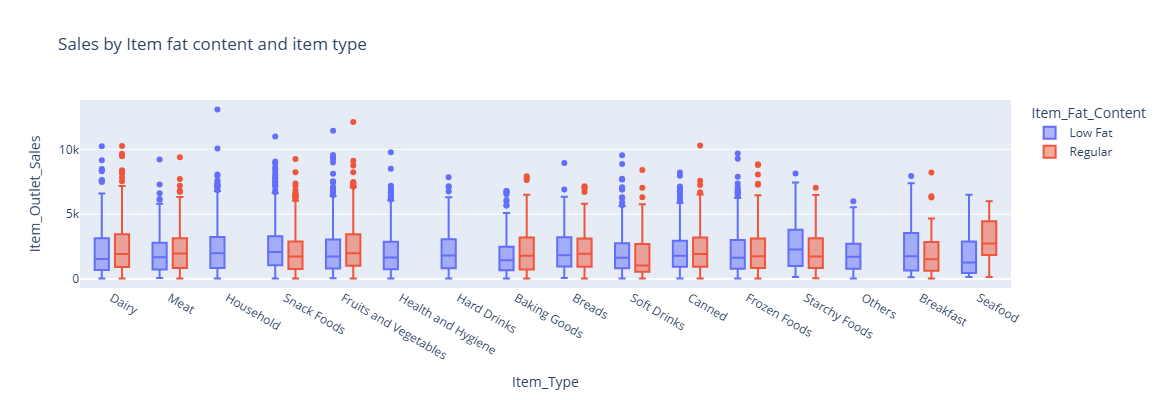

In [439]:
fig=px.box(train_dataset,x="Item_Type",y="Item_Outlet_Sales",color="Item_Fat_Content",title="Sales by Item fat content and item type",width=800,height=400)
fig.show()

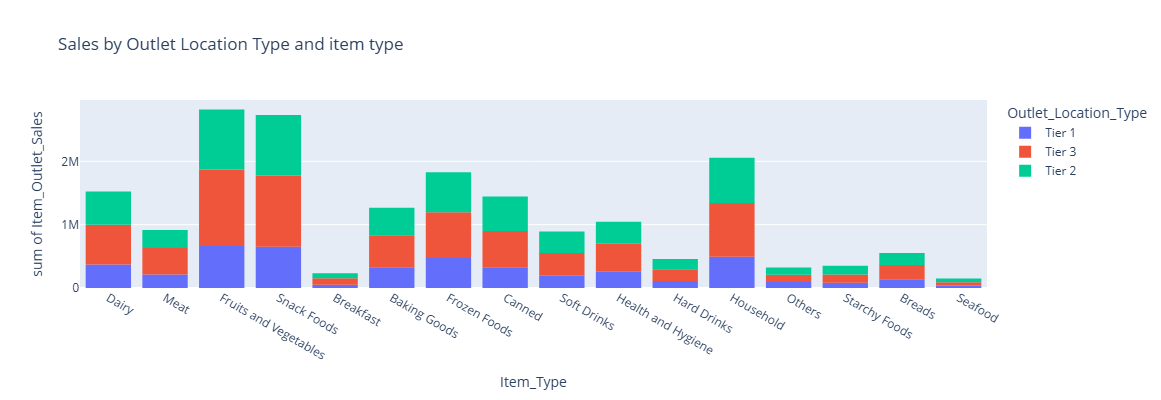

In [440]:
fig=px.histogram(train_dataset,x="Item_Type",y="Item_Outlet_Sales",color="Outlet_Location_Type",title="Sales by Outlet Location Type and item type",width=800,height=400)
fig.show()

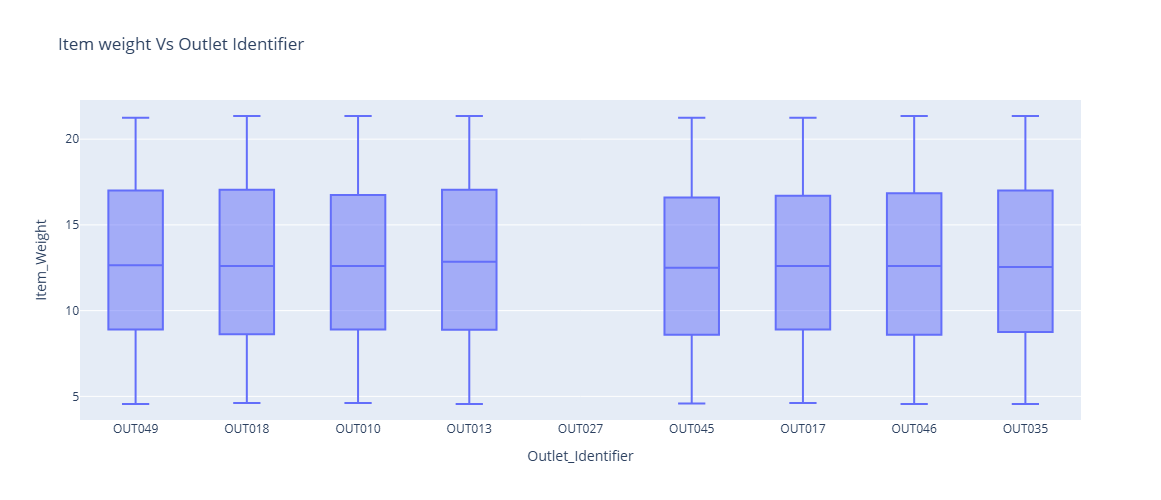

In [442]:
fig=px.box(train_dataset,x="Outlet_Identifier",y="Item_Weight",width=800,height=500,title="Item weight Vs Outlet Identifier")
fig.show()

In [ ]:
train_dataset['Current_Year']=(2022-train_dataset.Outlet_Establishment_Year)
train_dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Current_Year  
0  Supermarket Type1          3735.1380            23  
1  Supermarket Type2           443.4228            13  
2  Supermarket Type1          2097.2700            23  
3      Grocery Store           732.3800            24  
4  Supermarket Type1           994.7052            35

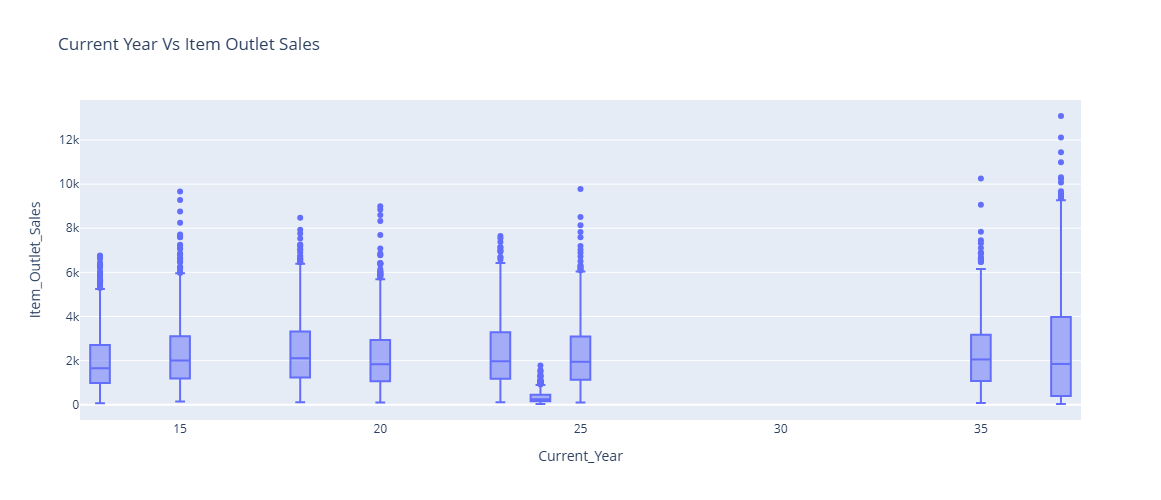

In [445]:
px.box(data_frame=train_dataset,x='Current_Year',y='Item_Outlet_Sales',width=800,height=500,title='Current Year Vs Item Outlet Sales')

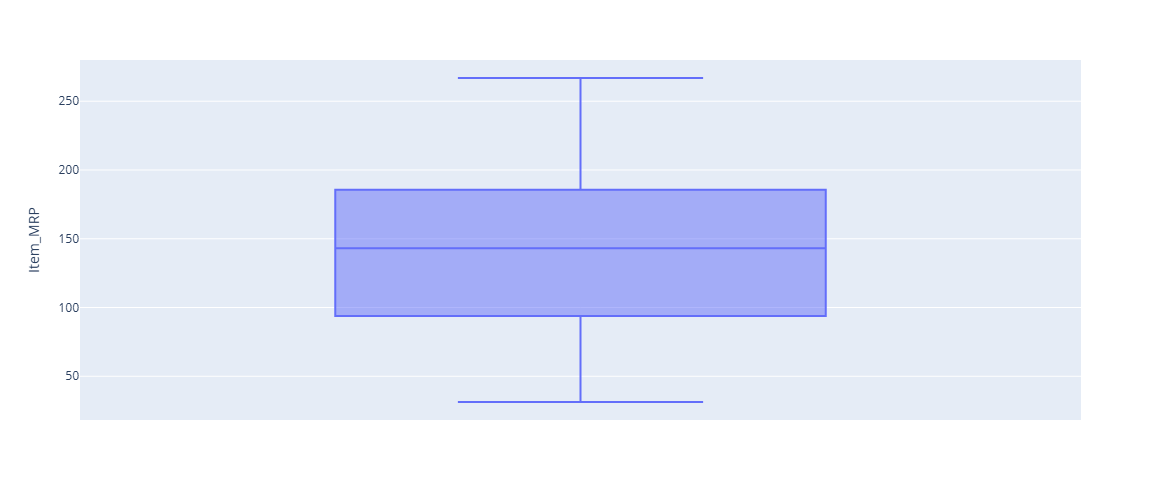

In [ ]:
fig=px.box(train_dataset,y="Item_MRP",width=800,height=500)
fig.show()

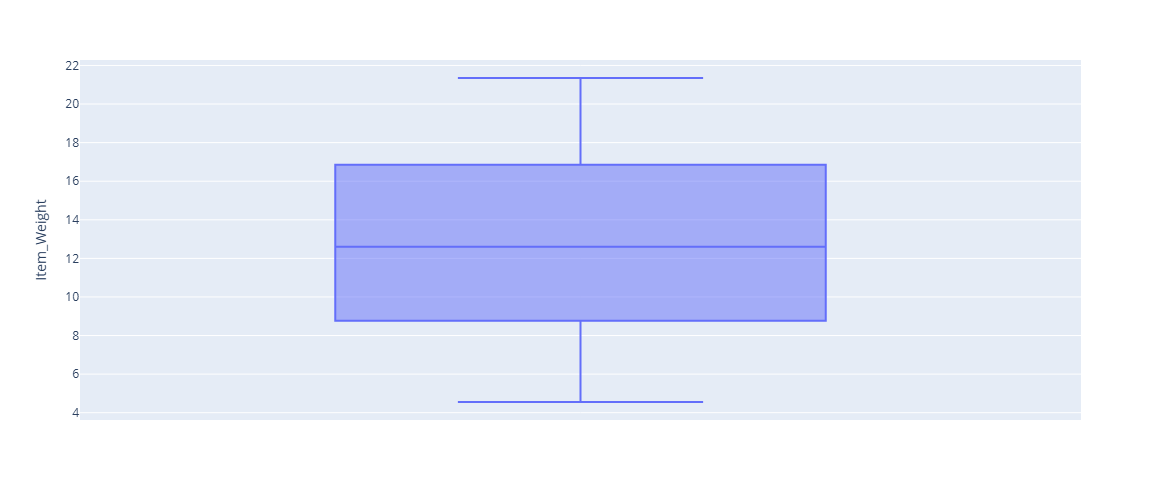

In [ ]:
fig=px.box(train_dataset,y="Item_Weight",width=800,height=500)
fig.show()

**DATA CLEANING**


In [449]:
train_dataset.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Current_Year                    0
dtype: int64

In [451]:
train_dataset.isnull().sum()/train_dataset.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Current_Year                  0.000000
dtype: float64

In [452]:
print(train_dataset.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Current_Year                    0
dtype: int64


In [453]:
print(train_dataset.duplicated().sum())


0


In [454]:
print(train_dataset.describe())


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  Current_Year  
count        8523.000000   8523.000000  
mean         2181.288914     24.168133  
std          1706.499616      8.371760  
min            33.290000     13.000000  
25%           834.247400     18.000000  
50%          1794.331000     23.000000  
7

In [ ]:
#remplacer les valeur egal a 0 par la mediane de colonne :
print(train_dataset['Item_Visibility'].describe())
low_visibility_train = train_dataset[train_dataset['Item_Visibility'] < 0.05]
print(low_visibility_train)
median_visibility = train_dataset['Item_Visibility'].median()
train_dataset['Item_Visibility'] = train_dataset['Item_Visibility'].apply(
    lambda x: median_visibility if x < 0.05 else x)

print(train_dataset['Item_Visibility'].describe())

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat         0.016047   
1              DRC01         5.92          Regular         0.019278   
2              FDN15        17.50          Low Fat         0.016760   
3              FDX07        19.20          Regular         0.000000   
4              NCD19         8.93          Low Fat         0.000000   
...              ...          ...              ...              ...   
8513           FDH31        12.00          Regular         0.020407   
8515           FDH24        20.70          Low Fat         0.021518   
8519           FDS36         8.38          Regular         0.046982   
8520           NCJ29        10.60          Low Fat         0.035186   
8522         

In [ ]:
#remplacer les valeur egal a 0 par la mediane de colonne :
median_visibility = train_dataset['Item_Visibility'].median()
train_dataset['Item_Visibility'] = train_dataset['Item_Visibility'].replace(0, median_visibility)

# Afficher les statistiques après correction
print(train_dataset['Item_Visibility'].describe())


count    8523.000000
mean        0.079832
std         0.040514
min         0.050000
25%         0.053931
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


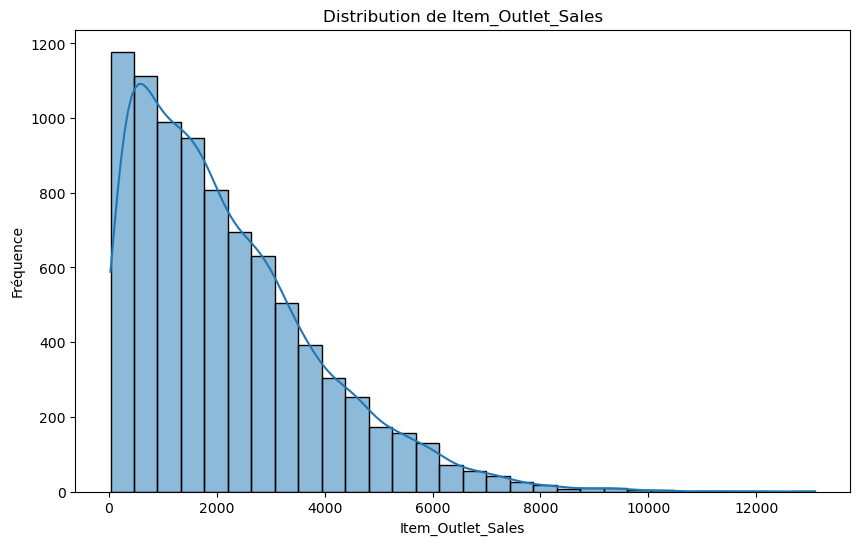

Nombre d'outliers détectés : 186
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02        21.35          Low Fat         0.069103   
130            FDY25          NaN          Low Fat         0.053931   
132            NCR53          NaN          Low Fat         0.144338   
145            FDP16        18.60          Low Fat         0.053931   
203            FDI24          NaN          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55        16.20          Low Fat         0.053931   
8329           NCQ06          NaN          Low Fat         0.053931   
8350           NCE18        10.00          Low Fat         0.053931   
8447           FDS26        20.35          Low Fat         0.089975   
8510           FDN58        13.80          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018

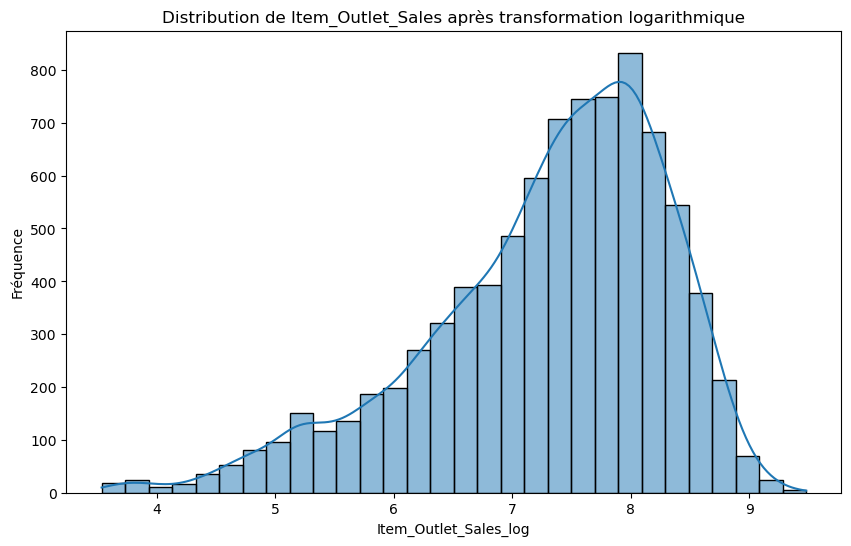

In [ ]:
#gerer les outlets

plt.figure(figsize=(10, 6))
sns.histplot(train_dataset['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution de Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Fréquence')
plt.show()

Q1 = train_dataset['Item_Outlet_Sales'].quantile(0.25)
Q3 = train_dataset['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_dataset[(train_dataset['Item_Outlet_Sales'] < lower_bound) | 
                         (train_dataset['Item_Outlet_Sales'] > upper_bound)]
print(f"Nombre d'outliers détectés : {outliers.shape[0]}")
print(outliers)
train_dataset['Item_Outlet_Sales_log'] = np.log1p(train_dataset['Item_Outlet_Sales'])
plt.figure(figsize=(10, 6))
sns.histplot(train_dataset['Item_Outlet_Sales_log'], kde=True, bins=30)
plt.title('Distribution de Item_Outlet_Sales après transformation logarithmique')
plt.xlabel('Item_Outlet_Sales_log')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
#remplacer les outliers par la médiane
median_value = train_dataset['Item_Outlet_Sales'].median()

train_dataset['Item_Outlet_Sales'] = np.where(
    (train_dataset['Item_Outlet_Sales'] < lower_bound) | 
    (train_dataset['Item_Outlet_Sales'] > upper_bound), 
    median_value, 
    train_dataset['Item_Outlet_Sales']
)


In [ ]:
train_dataset['Item_Weight']=train_dataset['Item_Weight'].fillna(train_dataset['Item_Weight'].mean())

In [465]:
train_dataset['Item_Weight'].isnull().sum()

0

In [ ]:
train_dataset['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [468]:
train_dataset['Outlet_Size']=train_dataset['Outlet_Size'].fillna(train_dataset['Outlet_Size'].mode()[0])
train_dataset['Outlet_Size'].isna().sum()

0

In [469]:
train_dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.053931   
1           DRC01         5.92          Regular         0.053931   
2           FDN15        17.50          Low Fat         0.053931   
3           FDX07        19.20          Regular         0.053931   
4           NCD19         8.93          Low Fat         0.053931   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Current_Year  Item_Outlet_Sales_log  
0  Supermarket Type1          3735.1380            23               8.225808  
1  Supermarket Type2           443.4228            13               6.096776  
2  Supermarket Type1          2097.2700            23               7.648868  
3      Grocery Store           732.3800            24               6.597664  
4  Supermarket Type1           994.7052            35               6.903451

In [470]:
print(train_dataset.dtypes)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Current_Year                   int64
Item_Outlet_Sales_log        float64
dtype: object


# **Correlation**

In [473]:
train_dataset.corr(numeric_only=True)


Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012177  0.024756   
Item_Visibility              -0.012177         1.000000 -0.006471   
Item_MRP                      0.024756        -0.006471  1.000000   
Outlet_Establishment_Year    -0.008301        -0.083467  0.005020   
Item_Outlet_Sales             0.012752        -0.140188  0.535620   
Current_Year                  0.008301         0.083467 -0.005020   
Item_Outlet_Sales_log         0.008059        -0.209060  0.509886   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008301           0.012752   
Item_Visibility                            -0.083467          -0.140188   
Item_MRP                                    0.005020           0.535620   
Outlet_Establishment_Year                   1.000000           0.009801   
Item_Outlet_Sales                           0.009801           1.000000   
Current_Year                               -1.000000          -0.009801   
Item_Outlet_Sales_log                       0.077032           0.846776   

                           Current_Year  Item_Outlet_Sales_log  
Item_Weight                    0.008301               0.008059  
Item_Visibility                0.083467              -0.209060  
Item_MRP                      -0.005020               0.509886  
Outlet_Establishment_Year     -1.000000               0.077032  
Item_Outlet_Sales             -0.009801               0.846776  
Current_Year                   1.000000              -0.077032  
Item_Outlet_Sales_log         -0.077032               1.000000

In [475]:
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Current_Year']
train_dataset[numeric_cols].corr()


Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012177  0.024756   
Item_Visibility              -0.012177         1.000000 -0.006471   
Item_MRP                      0.024756        -0.006471  1.000000   
Outlet_Establishment_Year    -0.008301        -0.083467  0.005020   
Item_Outlet_Sales             0.012752        -0.140188  0.535620   
Current_Year                  0.008301         0.083467 -0.005020   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008301           0.012752   
Item_Visibility                            -0.083467          -0.140188   
Item_MRP                                    0.005020           0.535620   
Outlet_Establishment_Year                   1.000000           0.009801   
Item_Outlet_Sales                           0.009801           1.000000   
Current_Year                               -1.000000          -0.009801   

                           Current_Year  
Item_Weight                    0.008301  
Item_Visibility                0.083467  
Item_MRP                      -0.005020  
Outlet_Establishment_Year     -1.000000  
Item_Outlet_Sales             -0.009801  
Current_Year                   1.000000

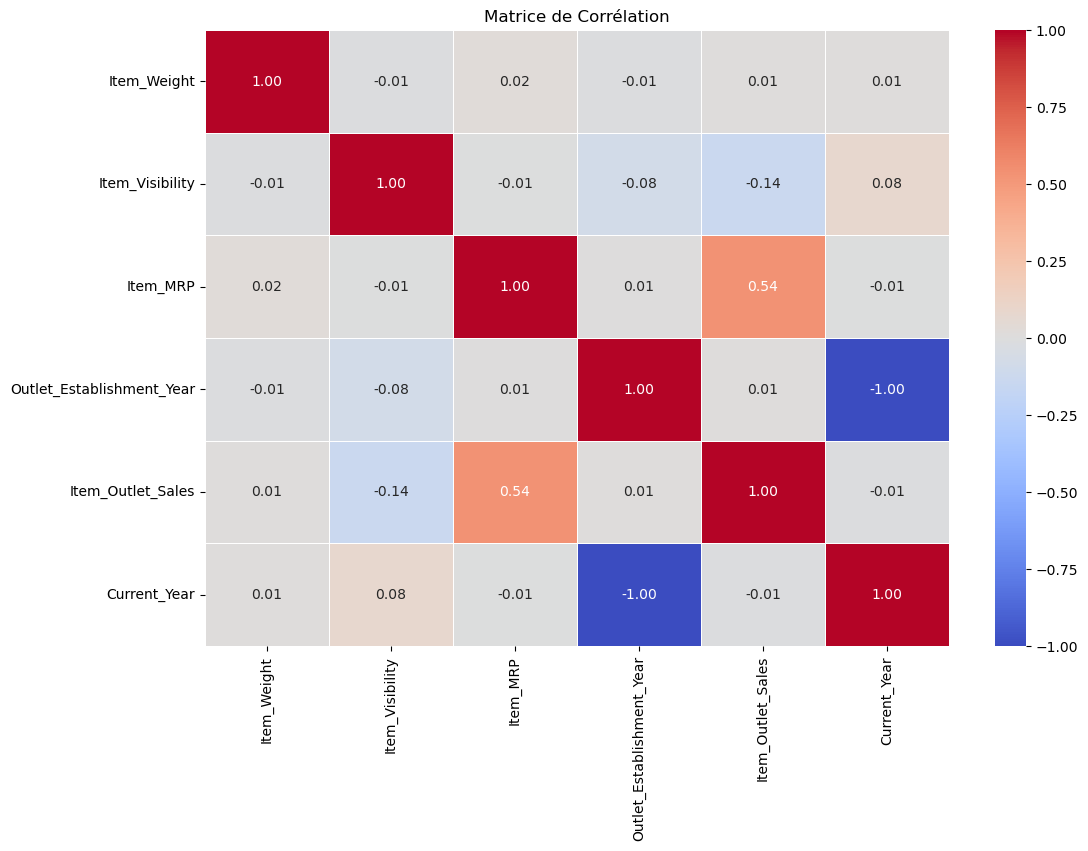

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Current_Year']
correlation_matrix = train_dataset[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()


In [478]:
data=train_dataset[['Item_Weight','Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']]
data.head(2)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.053931        Dairy  249.8092   
1         5.92          Regular         0.053931  Soft Drinks   48.2692   

  Outlet_Size Outlet_Location_Type        Outlet_Type  \
0      Medium               Tier 1  Supermarket Type1   
1      Medium               Tier 3  Supermarket Type2   

   Outlet_Establishment_Year  
0                       1999  
1                       2009

In [480]:
data.to_csv('cleaned_data.csv')

In [482]:
train_dataset=train_dataset.iloc[0:7102]

In [483]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.053931   
1              DRC01        5.920          Regular         0.053931   
2              FDN15       17.500          Low Fat         0.053931   
3              FDX07       19.200          Regular         0.053931   
4              NCD19        8.930          Low Fat         0.053931   
...              ...          ...              ...              ...   
7097           NCW29       14.000          Low Fat         0.053931   
7098           FDG33        5.365          Regular         0.140124   
7099           FDV51       16.350          Low Fat         0.053931   
7100           NCQ18       15.750          Low Fat         0.135837   
7101           NCL53        7.500          Low Fat         0.053931   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
7097     Health and Hygiene  131.3310            OUT017   
7098                Seafood  172.0764            OUT013   
7099                   Meat  165.7842            OUT017   
7100              Household  100.3700            OUT017   
7101     Health and Hygiene  177.9028            OUT018   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
7097                       2007      Medium               Tier 2   
7098                       1987        High               Tier 3   
7099                       2007      Medium               Tier 2   
7100                       2007      Medium               Tier 2   
7101                       2009      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  Current_Year  \
0     Supermarket Type1          3735.1380            23   
1     Supermarket Type2           443.4228            13   
2     Supermarket Type1          2097.2700            23   
3         Grocery Store           732.3800            24   
4     Supermarket Type1           994.7052            35   
...                 ...                ...           ...   
7097  Supermarket Type1          3635.2680            15   
7098  Supermarket Type1          2748.4224            35   
7099  Supermarket Type1          1823.6262            15   
7100  Supermarket Type1          1298.3100            15   
7101  Supermarket Type2          1416.8224            13   

      Item_Outlet_Sales_log  
0                  8.225808  
1                  6.096776  
2                  7.648868  
3                  6.597664  
4                  6.903451  
...                     ...  
7097               8.198713  
7098               7.919146  
7099               7.509130  
7100               7.169589  
7101               7.256877  

[7102 rows x 14 columns]

In [484]:
print(train_dataset.shape)

(7102, 14)


In [486]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Current_Year',
       'Item_Outlet_Sales_log'],
      dtype='object')

In [488]:
X=train_dataset[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']]
X.head(2)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.053931        Dairy  249.8092   
1         5.92          Regular         0.053931  Soft Drinks   48.2692   

  Outlet_Size Outlet_Location_Type        Outlet_Type  \
0      Medium               Tier 1  Supermarket Type1   
1      Medium               Tier 3  Supermarket Type2   

   Outlet_Establishment_Year  
0                       1999  
1                       2009

In [489]:
y=train_dataset['Item_Outlet_Sales']
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [491]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Current_Year',
       'Item_Outlet_Sales_log'],
      dtype='object')

In [493]:
#encoding categorical features
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
     transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)])

**Model Building**

In [497]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [498]:
X_train.shape, X_test.shape

((5681, 9), (1421, 9))

In [500]:
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Establishment_Year'],
      dtype='object')

In [501]:
X_train.head(5)

Item_Weight Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
181     11.300000          Low Fat         0.053931       Meat  198.1426   
4793    12.857645          Low Fat         0.102372  Household  221.2456   
794     17.600000          Regular         0.053931     Breads   47.2402   
3593    16.700000          Low Fat         0.070297      Dairy  216.3850   
1536    17.100000          Low Fat         0.053931  Household  165.0842   

     Outlet_Size Outlet_Location_Type        Outlet_Type  \
181       Medium               Tier 2  Supermarket Type1   
4793       Small               Tier 1      Grocery Store   
794       Medium               Tier 2  Supermarket Type1   
3593      Medium               Tier 2  Supermarket Type1   
1536        High               Tier 3  Supermarket Type1   

      Outlet_Establishment_Year  
181                        2002  
4793                       1985  
794                        2002  
3593                       2002  
1536                       1987

In [502]:
#linear regression
linear_reg_clf = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg_clf.fit(X_train, y_train)

y_pred = linear_reg_clf.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print("The R-squared value using Linear Regression :{}".format(linear_reg_r2_score))



The Mean Squared Error using Linear Regression :1104760.768830872
The Root Mean Squared Error using Linear Regression :1051.0760052588357
The R-squared value using Linear Regression :0.48912308581288766


In [504]:
#decision tree regressor
decision_tree_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree_clf.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree_clf.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred1)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The The Root Mean Squared Error Using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The R-squared value using Decision Tree :{}".format(decision_tree_r2_score))


The Mean Squared Error using Decision Tree Regressor : 1030776.4718787628
The The Root Mean Squared Error Using Decision Tree Regressor : 1015.27162467921
The R-squared value using Decision Tree :0.5233358044317752


In [506]:
#Random forest regressor
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('rf_regressor', RandomForestRegressor())])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))


The Mean Squared Error using Random Forest Regressor : 1141376.273110086
The The Root Mean Squared Error Using Random Forest Regressor : 1068.3521297353632
The R-squared value using Random Forest :0.47219089889484045


In [508]:
#hyperparameter tunning
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('rf_regressor', RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=10,n_jobs=4,random_state=0))])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))


The Mean Squared Error using Random Forest Regressor : 1003896.6244022507
The The Root Mean Squared Error Using Random Forest Regressor : 1001.9464179297468
The R-squared value using Random Forest :0.535765910496415


In [509]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('rf_regressor', RandomForestRegressor(n_estimators=100,max_depth=7, min_samples_leaf=85,n_jobs=4,random_state=0))])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1001025.3139544248
The The Root Mean Squared Error Using Random Forest Regressor : 1000.5125256359487
The R-squared value using Random Forest :0.5370936968033191


After hyperparameter tunning r2_score improved

In [513]:
#gradient boosting regressor
gradient_boosting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('gradient_boosting_regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

gradient_boosting_clf.fit(X_train, y_train)

y_pred3 = gradient_boosting_clf.predict(X_test)
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The The Root Mean Squared Error Using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The R-squared score using Gradient Boosting Regressor :{}".format(gradient_boosting_r2_score))


The Mean Squared Error using Gradient Boosting Regressor : 1006424.2317384578
The The Root Mean Squared Error Using Gradient Boosting Regressor : 1003.2069735296191
The R-squared score using Gradient Boosting Regressor :0.5345970635635494


In [515]:
#adaboost regressor
ada_boosting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('adaboost_regressor', AdaBoostRegressor(n_estimators=100))])

ada_boosting_clf.fit(X_train, y_train)

y_pred4 = ada_boosting_clf.predict(X_test)

# Evaluation Metrics
adaboost_mse = mean_squared_error(y_test, y_pred4)
adaboost_rmse = mean_squared_error(y_test, y_pred4, squared=False)
ada_boosting_r2_score = r2_score(y_test, y_pred4)

print("The Mean Squared Error using Adaboost Regressor : {}".format(adaboost_mse))
print("The The Root Mean Squared Error Using Adaboost Regressor : {}".format(adaboost_rmse))
print("The R-squared score using Adaboost Regressor :{}".format(ada_boosting_r2_score))

The Mean Squared Error using Adaboost Regressor : 1066478.6483733044
The The Root Mean Squared Error Using Adaboost Regressor : 1032.7045310122855
The R-squared score using Adaboost Regressor :0.5068259696585897


In [517]:
#XGBoost regressor
xg_boost_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('xgb_regressor', xgb.XGBRegressor())])

xg_boost_clf.fit(X_train, y_train)

y_pred5 = xg_boost_clf.predict(X_test)

# Evaluation Metrics
xgboost_mse = mean_squared_error(y_test, y_pred5)
xgboost_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgboost_r2_score = r2_score(y_test, y_pred5)

print("The Mean Squared Error using XGBoost Regressor : {}".format(xgboost_mse))
print("The The Root Mean Squared Error Using XGBoost Regressor : {}".format(xgboost_rmse))
print("The R-squared score using XGBoost Regressor :{}".format(xgboost_r2_score))


The Mean Squared Error using XGBoost Regressor : 1247894.1957647316
The The Root Mean Squared Error Using XGBoost Regressor : 1117.0918475061626
The R-squared score using XGBoost Regressor :0.4229335853055689


In [518]:
#Hyperparameter tunning
xg_boost_clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('xgb_regressor', xgb.XGBRegressor(objective= 'reg:linear', max_depth= 4, n_estimators=10, alpha=10))])

xg_boost_clf.fit(X_train, y_train)

y_pred5 = xg_boost_clf.predict(X_test)

# Evaluation Metrics
xgboost_mse = mean_squared_error(y_test, y_pred5)
xgboost_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgboost_r2_score = r2_score(y_test, y_pred5)

print("The Mean Squared Error using XGBoost Regressor : {}".format(xgboost_mse))
print("The The Root Mean Squared Error Using XGBoost Regressor : {}".format(xgboost_rmse))
print("The R-squared score using XGBoost Regressor :{}".format(xgboost_r2_score))


The Mean Squared Error using XGBoost Regressor : 1000619.2483658434
The The Root Mean Squared Error Using XGBoost Regressor : 1000.30957626419
The R-squared score using XGBoost Regressor :0.537281474592597


In [520]:
#Support vector machine
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
('supoort_vector_regressor', SVR())])

svm_clf.fit(X_train, y_train)

y_pred6 = svm_clf.predict(X_test)

# Evaluation Metrics
svm_mse = mean_squared_error(y_test, y_pred6)
svm_rmse = mean_squared_error(y_test, y_pred6, squared=False)
svm_r2_score = r2_score(y_test, y_pred6)

print("The Mean Squared Error using Support Vector Machine : {}".format(svm_mse))
print("The Root Mean Squared Error using Support Vector Machine : {}".format(svm_rmse))
print("The R-squared score using Support Vector Machine :{}".format(svm_r2_score))

The Mean Squared Error using Support Vector Machine : 2050566.2906449104
The Root Mean Squared Error using Support Vector Machine : 1431.979849943745
The R-squared score using Support Vector Machine :0.05175219064901415


In [522]:
models = pd.DataFrame({
     'Model': ['Linear Regression', 'Decision Tree',
               'Random Forest', 'Gradient Boosting',
               'Adaboosting', 'XGBoost', 
               'Support Vector Machines'],
     'RMSE': [linear_reg_rmse, decision_tree_rmse, random_forest_rmse, 
               gradient_boosting_rmse, adaboost_rmse, 
               xgboost_rmse, svm_rmse],
     'r2_score': [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, ada_boosting_r2_score,
               gradient_boosting_r2_score, xgboost_r2_score, svm_r2_score]})
models.sort_values(by='RMSE', ascending=True)

Model         RMSE  r2_score
5                  XGBoost  1000.309576  0.537281
2            Random Forest  1000.512526  0.537094
3        Gradient Boosting  1003.206974  0.506826
1            Decision Tree  1015.271625  0.523336
4              Adaboosting  1032.704531  0.534597
0        Linear Regression  1051.076005  0.489123
6  Support Vector Machines  1431.979850  0.051752

we are performing model prediction using Random Forest

In [527]:
pickle.dump(rf_clf, open('rf_clf.pkl', 'wb'))

In [530]:
predictions=rf_clf.predict(X_test)
predictions

array([ 386.02026505,  176.36759745, 1712.7422372 , ..., 3060.43394658,
       1692.61960444, 2619.24663296])

In [532]:
predictions=pd.DataFrame(predictions)

In [535]:
predictions.to_csv('test_predictions.csv')